#Predict Customer Clicked Ads Classification by Using Machine Learning

Present By\
Muhammad Fu'ad Saifuddin\
Email : muh.fuad.saifuddin@gmail.com\
Linkedin :<https://www.linkedin.com/in/muhammad-fuad-saifuddin/>\
Github : <https://github.com/fuad-saifuddin>

##Background

“Sebuah perusahaan di Indonesia ingin mengetahui efektifitas sebuah iklan yang mereka tayangkan, hal ini penting bagi perusahaan agar dapat mengetahui seberapa besar ketercapainnya iklan yang dipasarkan sehingga dapat menarik customers untuk melihat iklan.
Dengan mengolah data historical advertisement serta menemukan insight serta pola yang terjadi, maka dapat membantu perusahaan dalam menentukan target marketing, fokus case ini adalah membuat model machine learning classification yang berfungsi menentukan target customers yang tepat ”


##Worksheet

In [ ]:
# Import modul yang digunakan`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Membuka dataset Clicked Ads Dataset.csv dan melihat informasi terkait kolom yang ada di dalamnya
df = pd.read_csv('Clicked Ads Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
649,649,84.31,29,329974470.0,225.87,Perempuan,1/6/2016 21:43,No,Semarang,Jawa Tengah,Furniture
232,232,62.42,38,521116260.0,143.94,Perempuan,7/19/2016 7:59,Yes,Bogor,Jawa Barat,Otomotif
183,183,67.58,41,455312130.0,255.61,Laki-Laki,2/1/2016 19:42,No,Tasikmalaya,Jawa Barat,Bank
899,899,35.66,45,323383130.0,151.72,Perempuan,4/29/2016 14:08,Yes,Surabaya,Jawa Timur,Health
133,133,75.70,29,473434080.0,215.44,Perempuan,1/14/2016 0:23,No,Bandar Lampung,Lampung,Furniture
18,18,54.70,36,217612780.0,NaN,Laki-Laki,2/13/2016 7:53,Yes,Makassar,Sulawesi Selatan,Travel
702,702,87.27,30,362768070.0,204.27,Laki-Laki,3/6/2016 6:51,Yes,Makassar,Sulawesi Selatan,Health
416,416,71.03,32,404926760.0,120.85,Perempuan,2/17/2016 23:47,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,House
865,865,39.53,33,281706740.0,142.21,Laki-Laki,6/1/2016 12:27,Yes,Denpasar,Bali,Otomotif
729,729,79.60,28,395990420.0,227.37,Laki-Laki,5/3/2016 16:55,No,Semarang,Jawa Tengah,Furniture


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'Index'})

In [ ]:
df.sample(10)

,Index,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
284,284,47.51,51,375903990.0,130.41,Laki-Laki,5/21/2016 1:36,Yes,Bandung,Jawa Barat,Travel
919,919,65.56,25,487524450.0,181.25,Laki-Laki,1/5/2016 12:59,No,Tangerang Selatan,Banten,Health
28,28,70.20,34,228962580.0,119.20,Perempuan,4/14/2016 5:08,Yes,Pontianak,Kalimantan Barat,House
845,845,44.16,42,431836510.0,133.42,Laki-Laki,5/25/2016 0:34,Yes,Makassar,Sulawesi Selatan,House
397,397,50.52,28,468503210.0,219.69,Perempuan,4/3/2016 6:17,Yes,Denpasar,Bali,House
621,621,87.85,31,365252860.0,210.27,Laki-Laki,6/14/2016 19:48,No,Bogor,Jawa Barat,Otomotif
380,380,80.22,30,432644170.0,224.58,Perempuan,7/5/2016 15:14,No,Bandar Lampung,Lampung,House
158,158,80.46,27,NaN,NaN,Laki-Laki,2/4/2016 2:13,No,Bandar Lampung,Lampung,Bank
16,16,55.39,37,167558020.0,129.41,Perempuan,1/30/2016 19:20,Yes,Semarang,Jawa Tengah,Finance
639,639,74.06,23,282418430.0,225.99,Perempuan,7/23/2016 6:18,No,Tangerang Selatan,Banten,Health


In [ ]:
# Memisahkan data kategorik dan data numerik untuk dilihat deskripsi masing masing kolomnya
cat =[]
num =[]

for column in df:
    types = df[column].dtypes
    if types in ['int64', 'float64']:
        num.append(column)
    else :
        cat.append(column)

In [ ]:
df[cat].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [ ]:
df[num].describe()

,Index,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


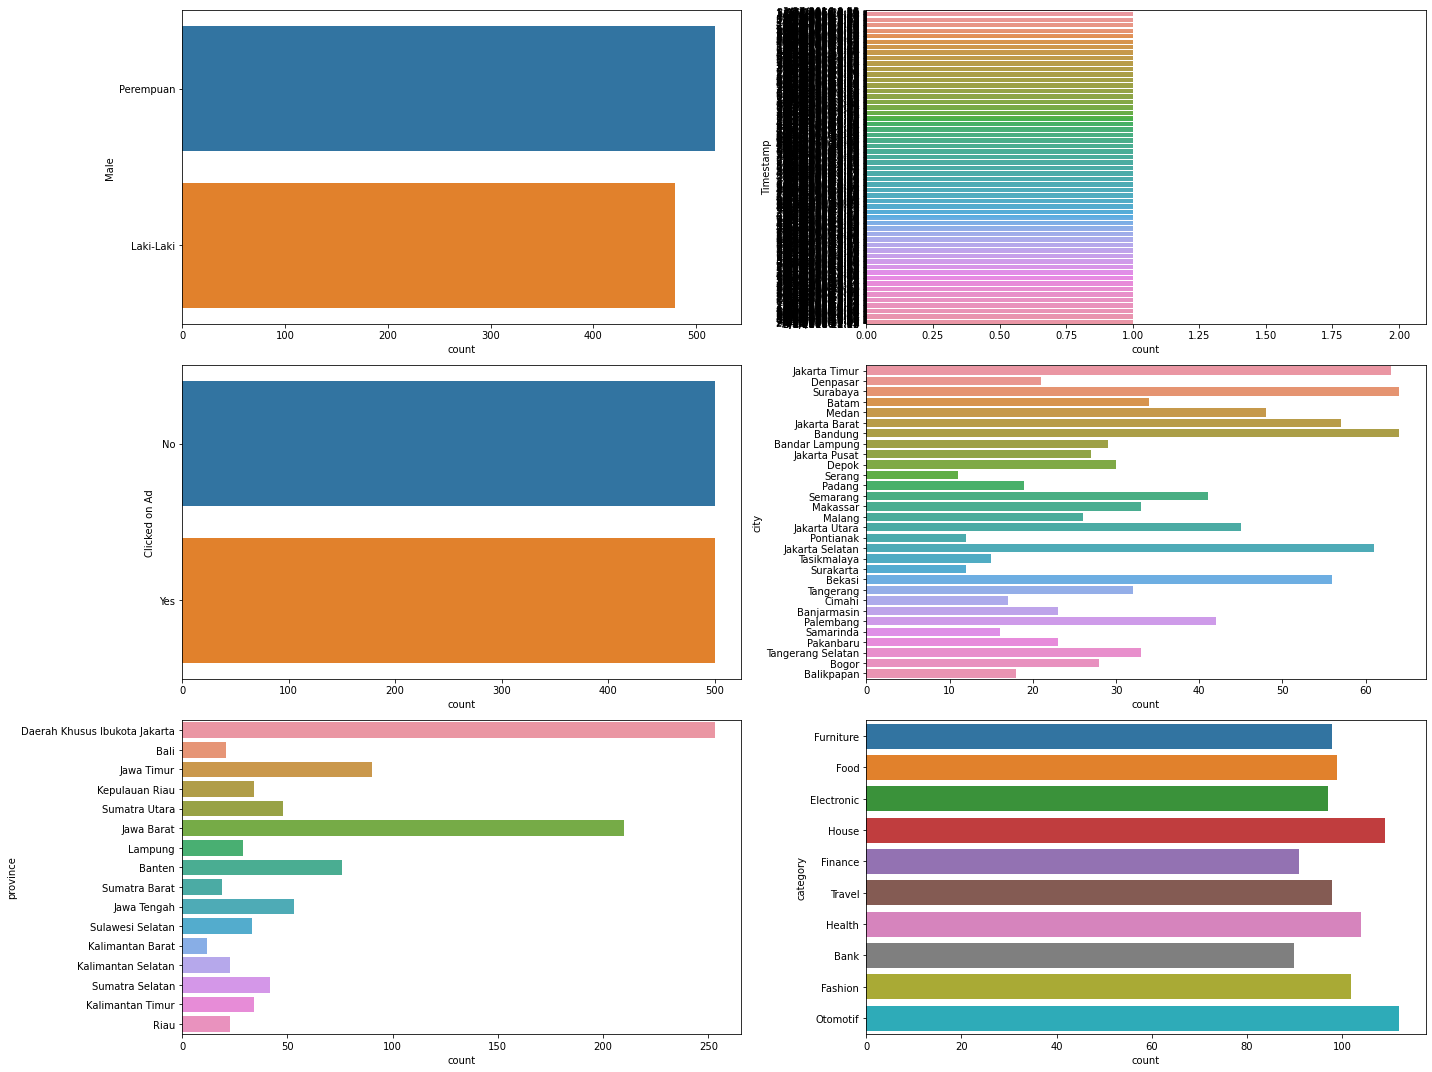

In [ ]:
plt.figure (figsize=(20,15))
for i in range(len(cat)):
  plt.subplot(3,2,i+1)
  sns.countplot(data=df, y= cat[i])
  plt.tight_layout()
plt.show()

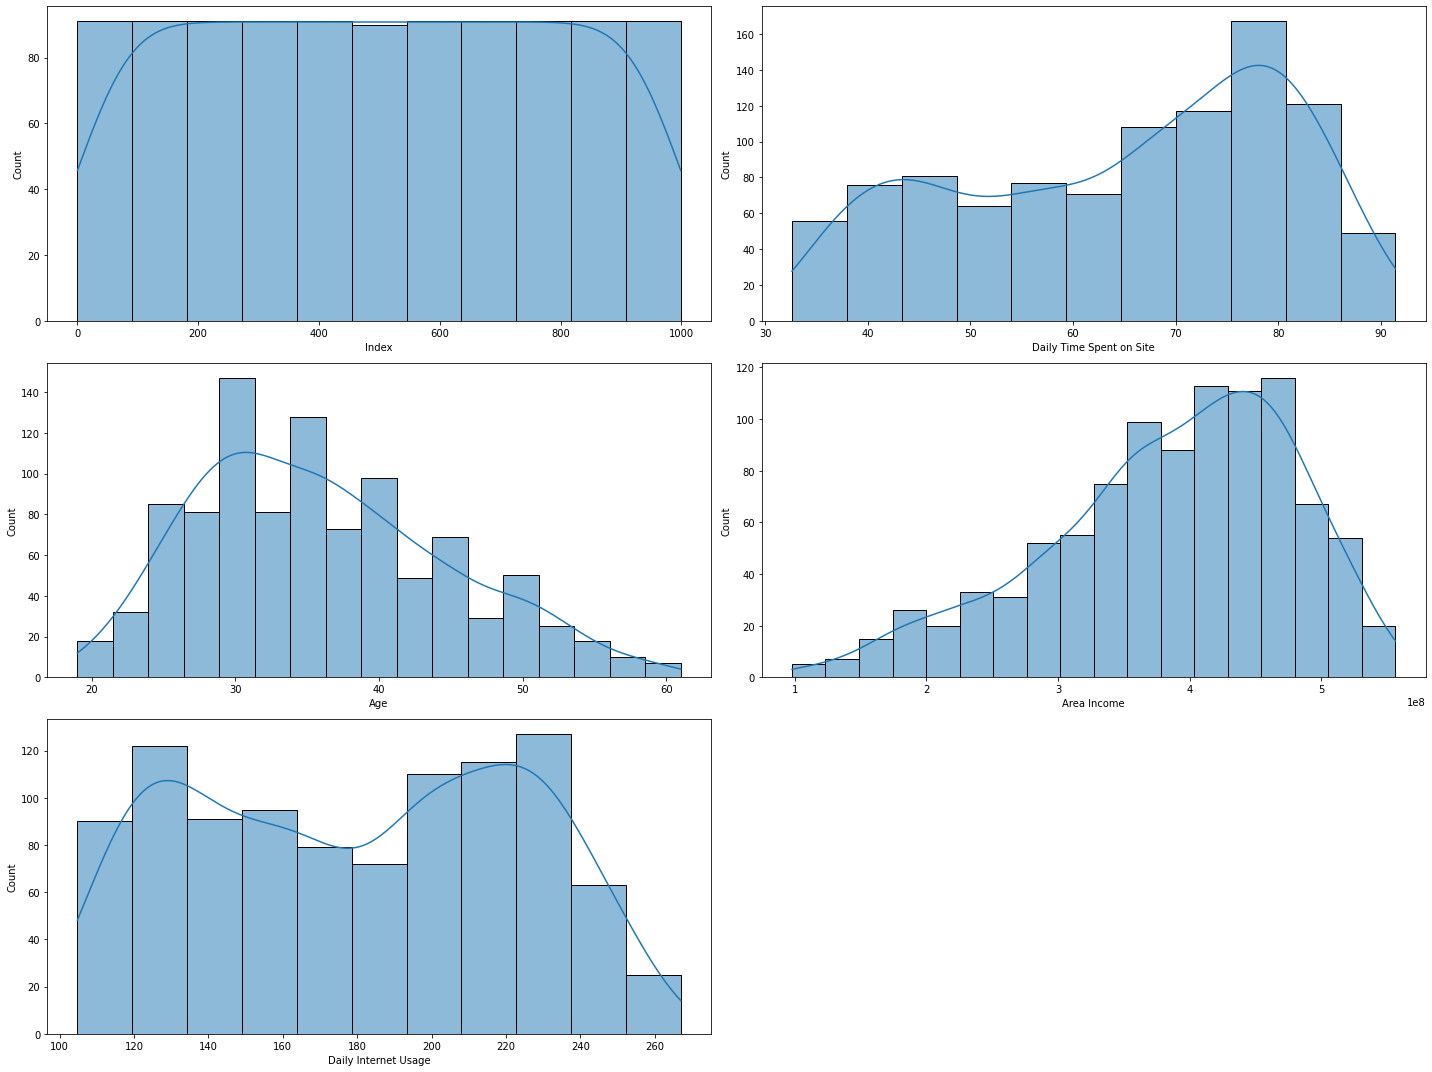

In [ ]:
plt.figure (figsize=(20,15))
for i in range(len(num)):
  plt.subplot(3,2,i+1)
  sns.histplot(data=df, x=num[i], kde = True)
  plt.tight_layout()
plt.show()

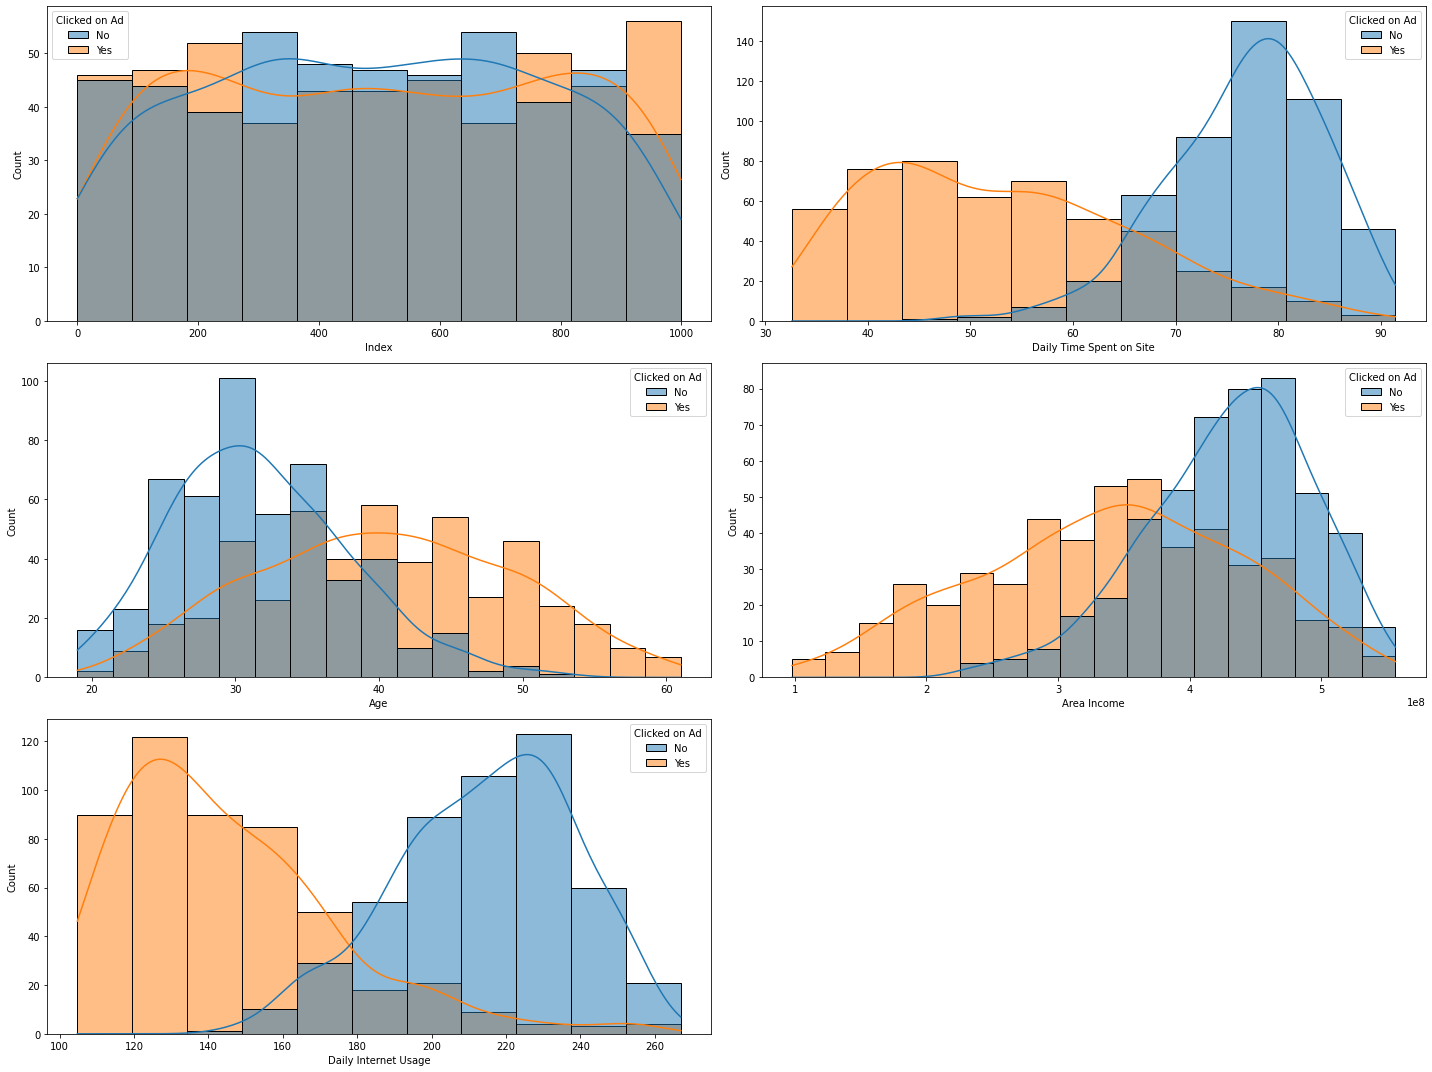

In [ ]:
plt.figure (figsize=(20,15))
for i in range(len(num)):
  plt.subplot(3,2,i+1)
  sns.histplot(data=df, x=num[i], hue ='Clicked on Ad', kde= True)
  plt.tight_layout()
plt.show()

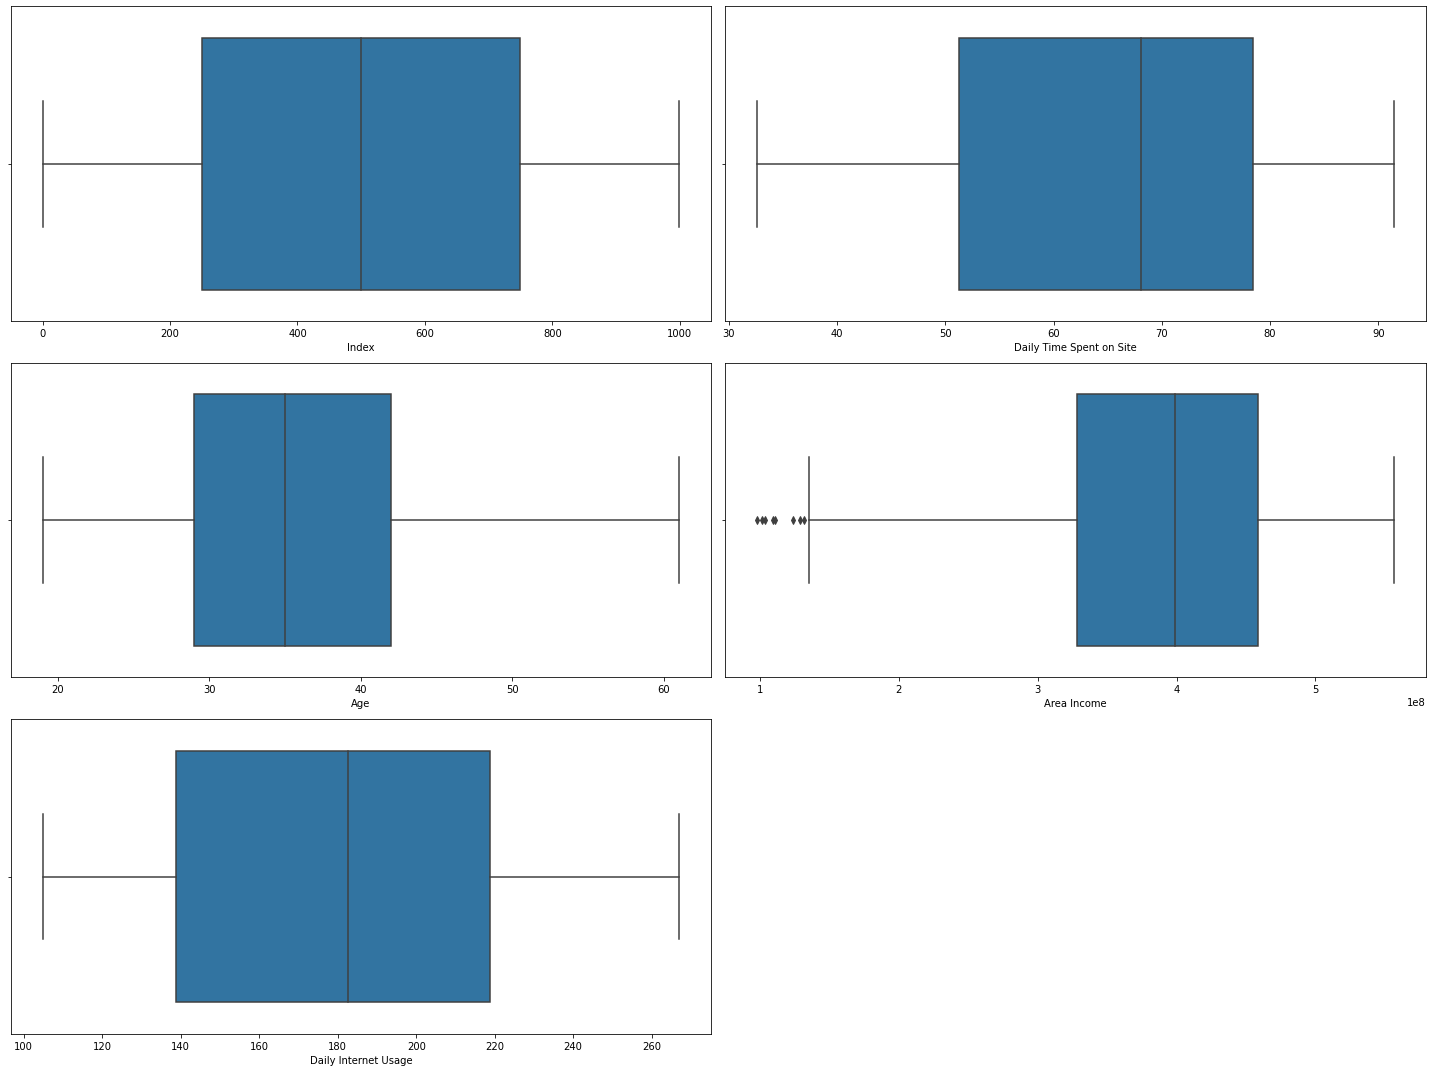

In [ ]:
plt.figure (figsize=(20,15))
for i in range(len(num)):
  plt.subplot(3,2,i+1)
  sns.boxplot(data=df, x=num[i])
  plt.tight_layout()
plt.show()

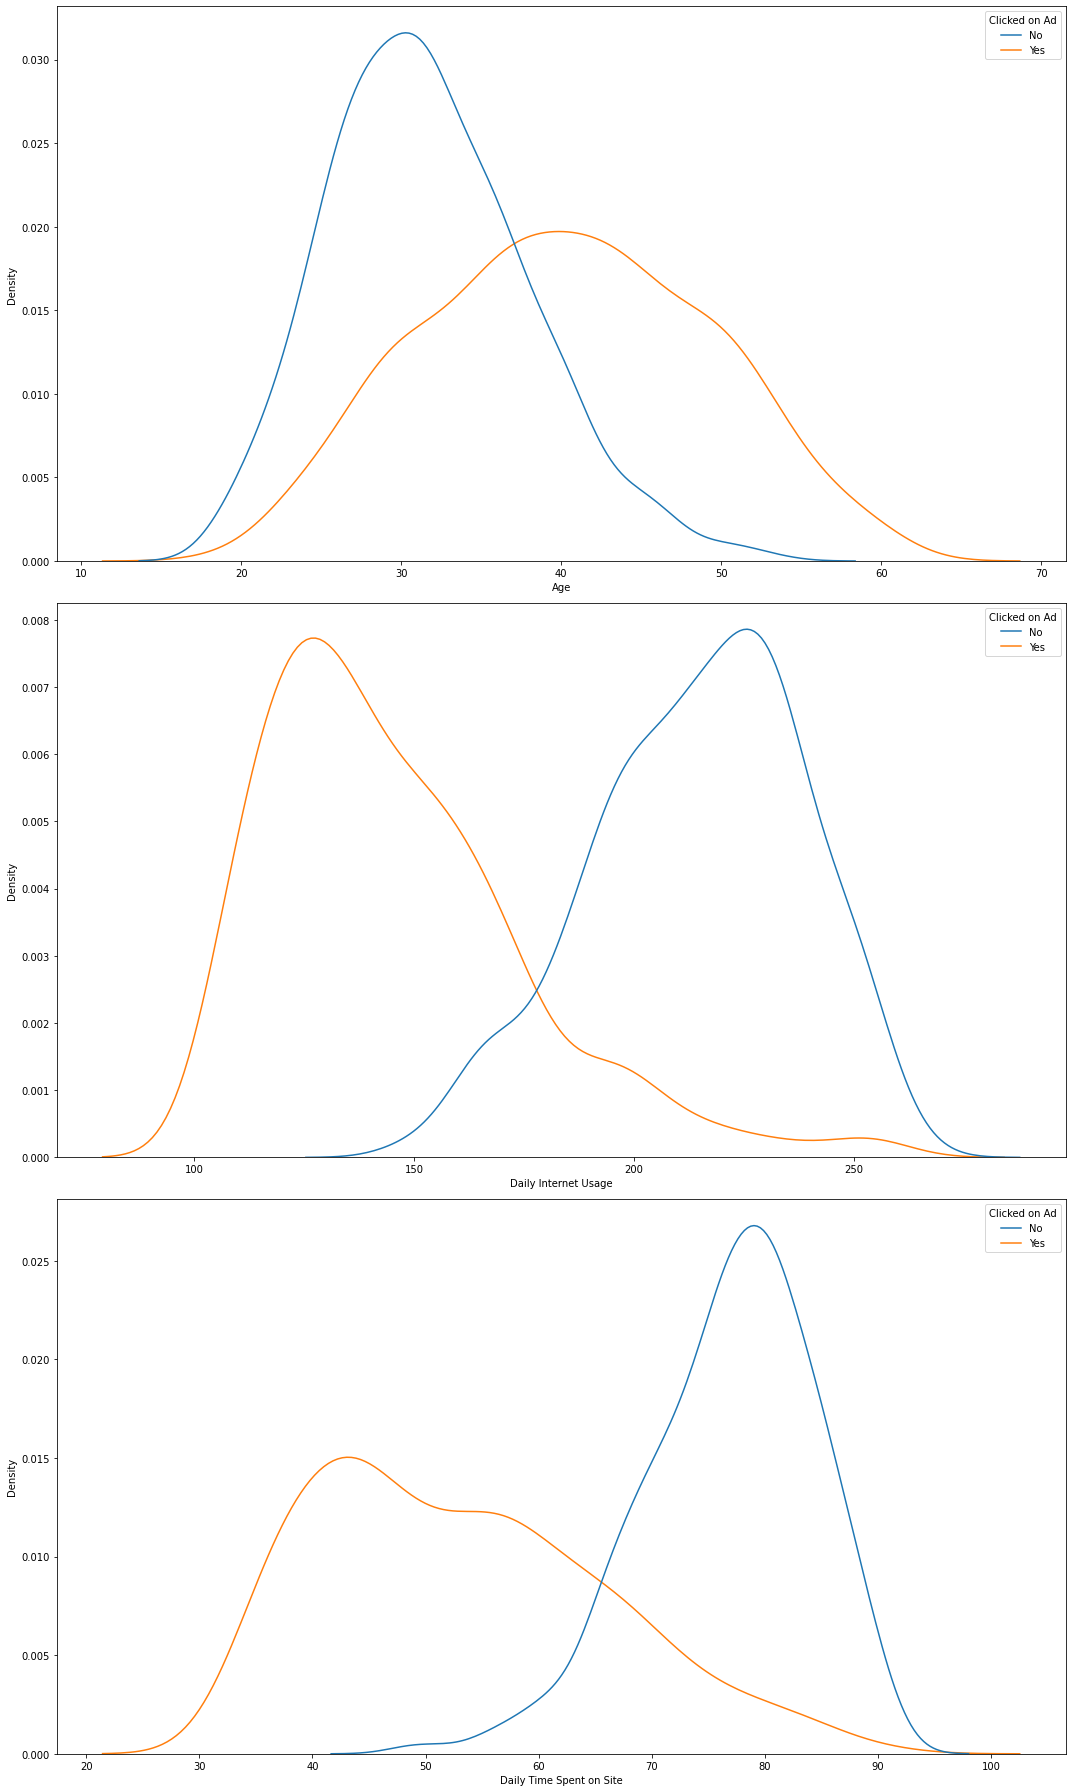

In [ ]:
feature = ['Age','Daily Internet Usage','Daily Time Spent on Site']

plt.figure (figsize=(15,25))
for i in range(len(feature)):
  plt.subplot(3,1,i+1)
  sns.kdeplot(data=df, x= feature[i], hue= 'Clicked on Ad')
  plt.tight_layout()
plt.show()

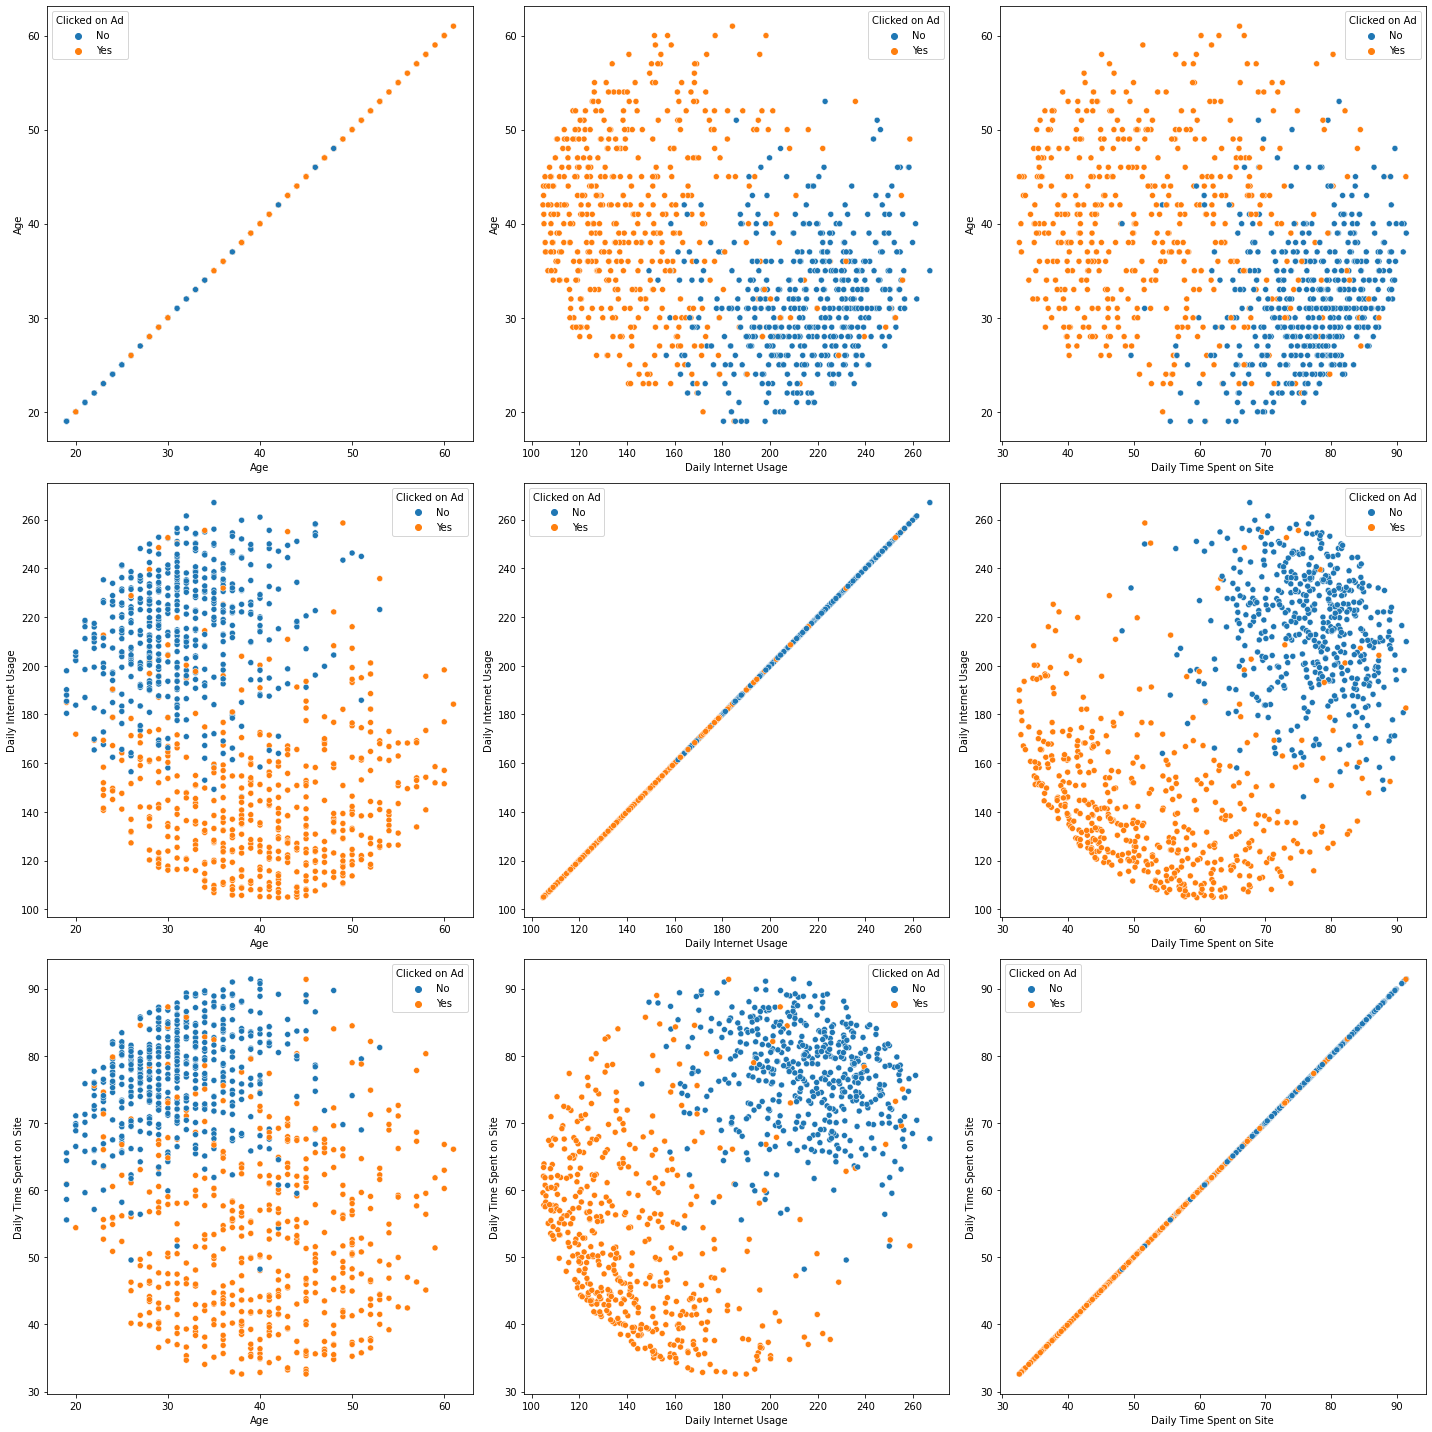

In [ ]:
feature = ['Age','Daily Internet Usage','Daily Time Spent on Site']

plt.figure (figsize=(20,20))
n=1
for i in range(len(feature)):
  for y in range(len(feature)):
    plt.subplot(3,3,n)
    sns.scatterplot(data=df, x= feature[y], y= feature[i], hue='Clicked on Ad')
    plt.tight_layout()
    n+=1

plt.show()

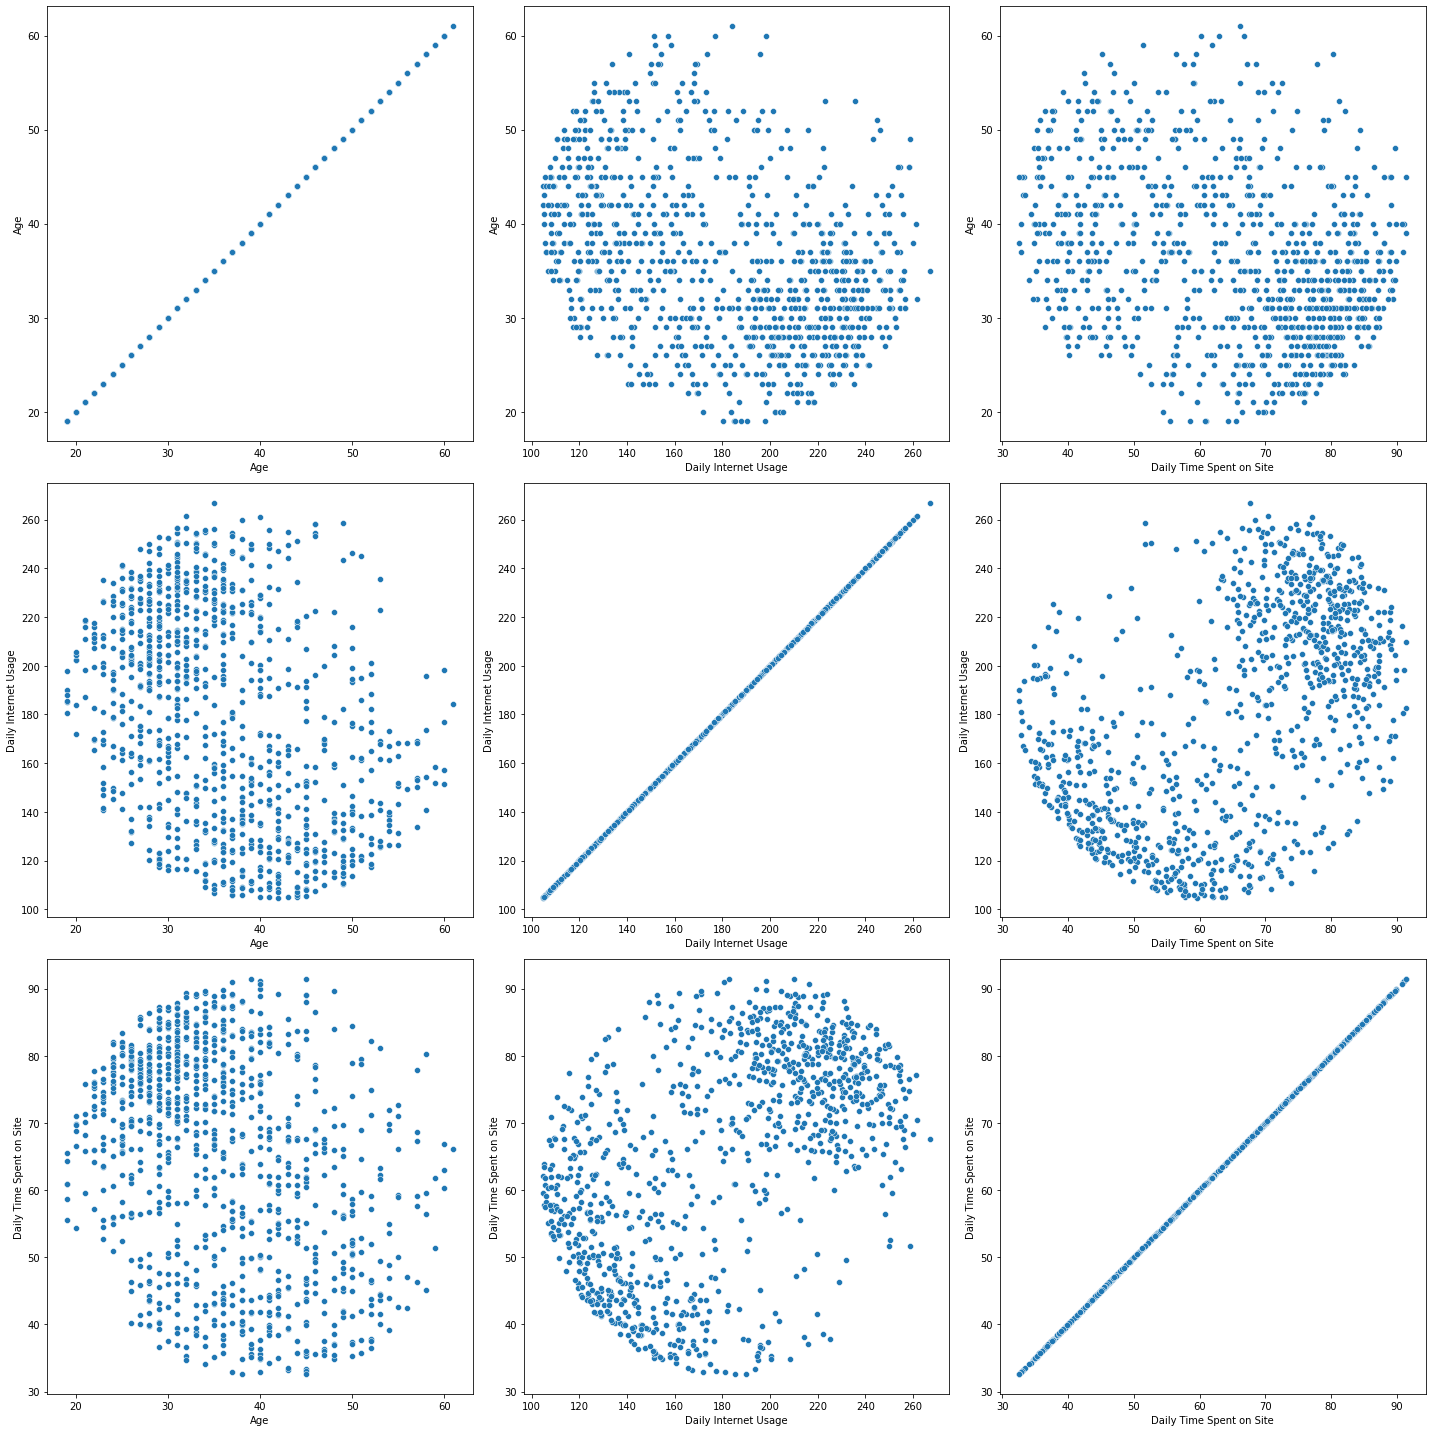

In [ ]:
feature = ['Age','Daily Internet Usage','Daily Time Spent on Site']

plt.figure (figsize=(20,20))
n=1
for i in range(len(feature)):
  for y in range(len(feature)):
    plt.subplot(3,3,n)
    sns.scatterplot(data=df, x= feature[y], y= feature[i])
    plt.tight_layout()
    n+=1

plt.show()

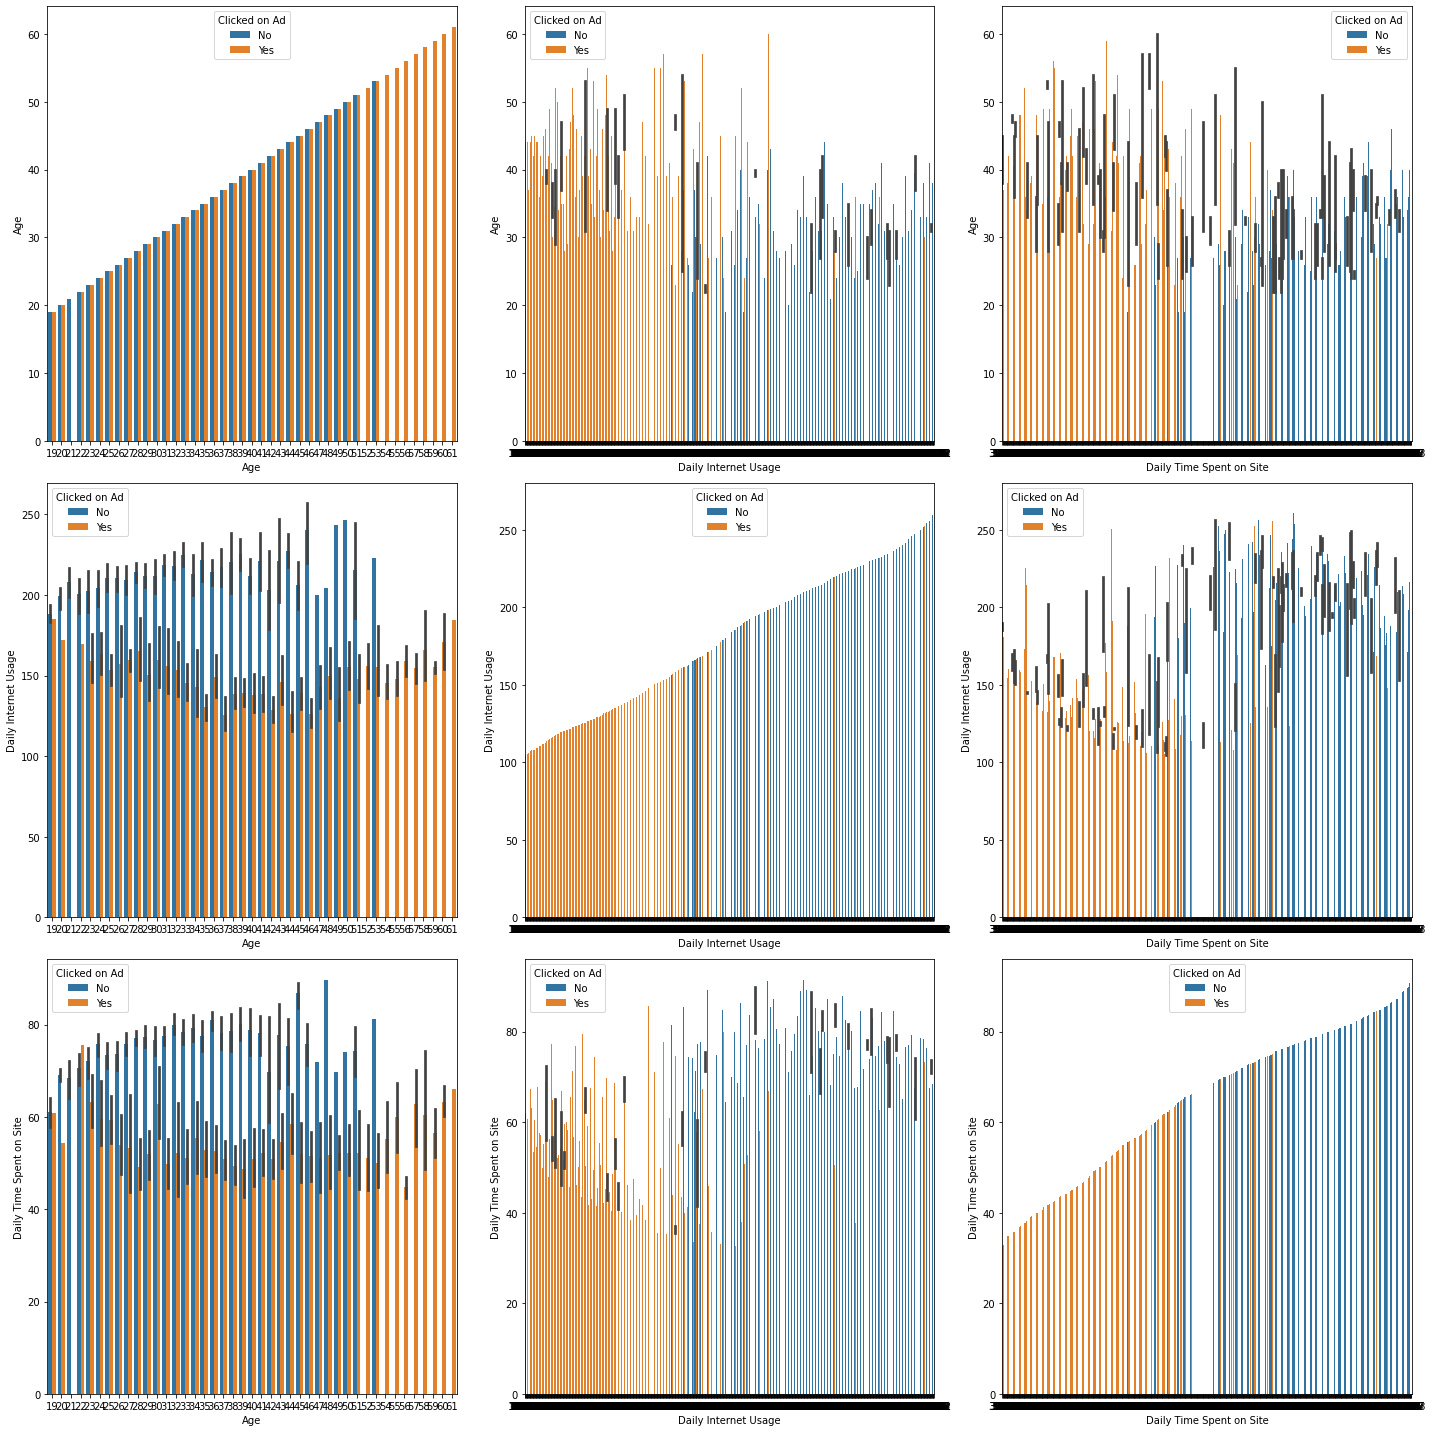

In [ ]:
feature = ['Age','Daily Internet Usage','Daily Time Spent on Site']

plt.figure (figsize=(20,20))
n=1
for i in range(len(feature)):
  for y in range(len(feature)):
    plt.subplot(3,3,n)
    sns.barplot(data=df, x= feature[y], y= feature[i], hue='Clicked on Ad')
    plt.tight_layout()
    n+=1

plt.show()

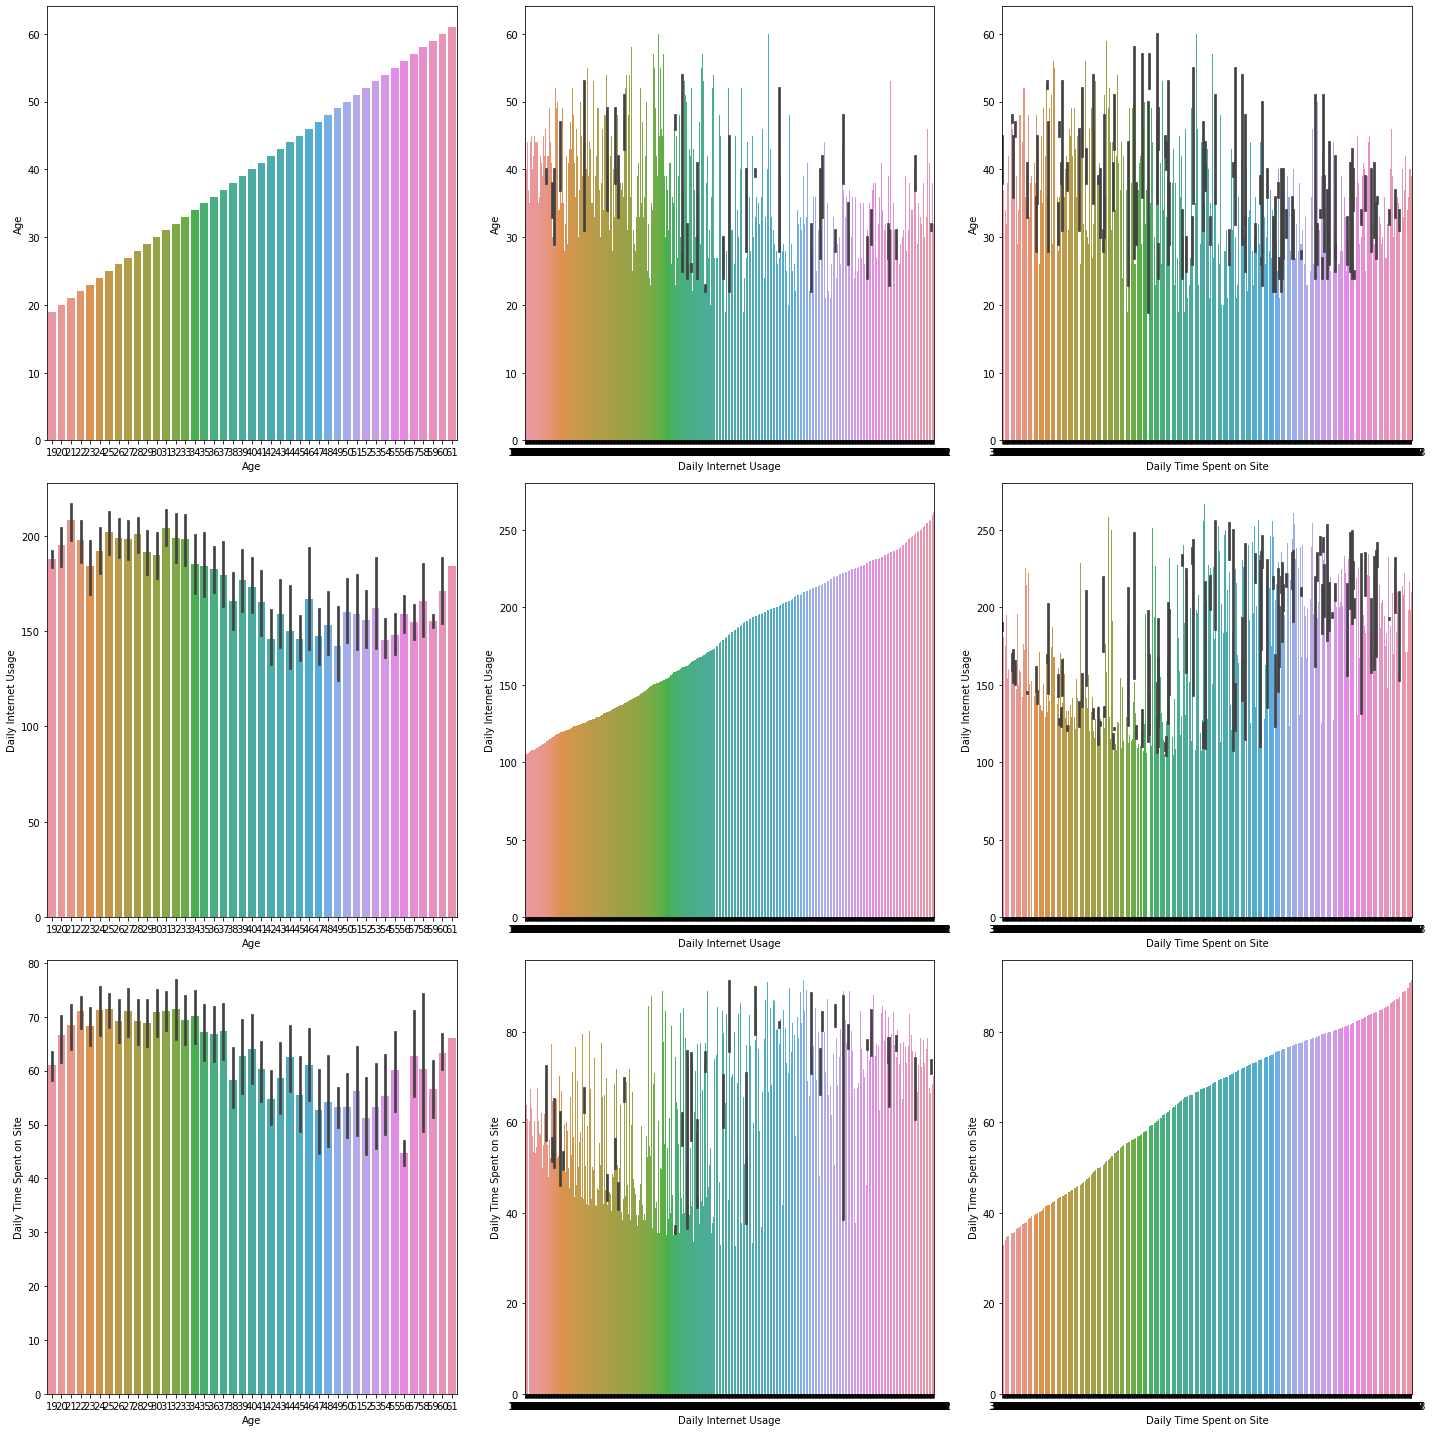

In [ ]:
feature = ['Age','Daily Internet Usage','Daily Time Spent on Site']

plt.figure (figsize=(20,20))
n=1
for i in range(len(feature)):
  for y in range(len(feature)):
    plt.subplot(3,3,n)
    sns.barplot(data=df, x= feature[y], y= feature[i])
    plt.tight_layout()
    n+=1

plt.show()

In [ ]:
df['ads_click'] = np.where(df['Clicked on Ad']=='Yes', 1, 0)

In [ ]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [ ]:
# Memisahkan data kategorik dan data numerik untuk dilihat deskripsi masing masing kolomnya
cat =[]
num =[]
time =[]

for column in df:
    types = df[column].dtypes
    if types in ['int64', 'float64']:
      num.append(column)
    elif types in ['object'] :
      cat.append(column)
    else :
      time.append(column)

In [ ]:
num

['Index',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'ads_click']

<Figure size 1080x720 with 0 Axes>

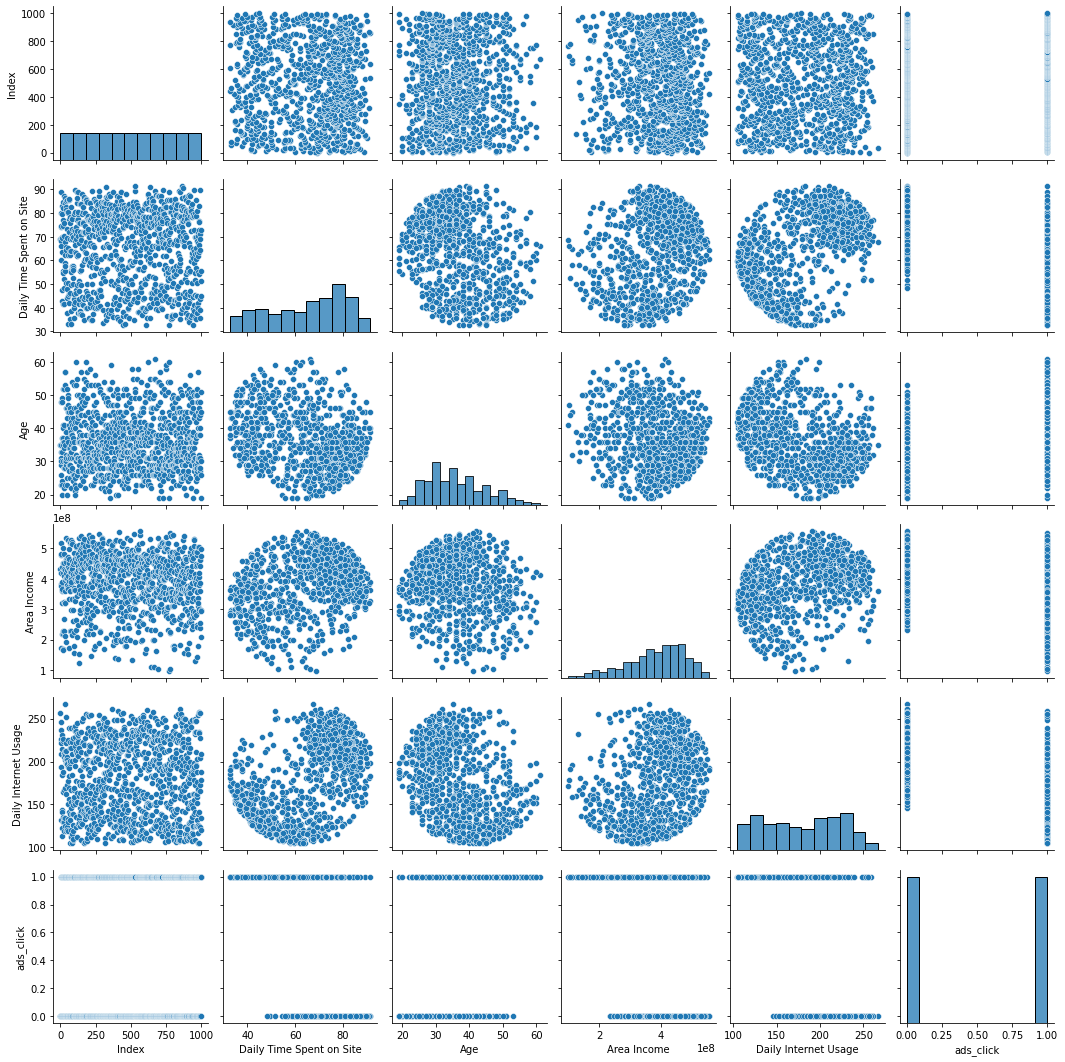

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(data = df[num])
plt.show()

<Figure size 1080x720 with 0 Axes>

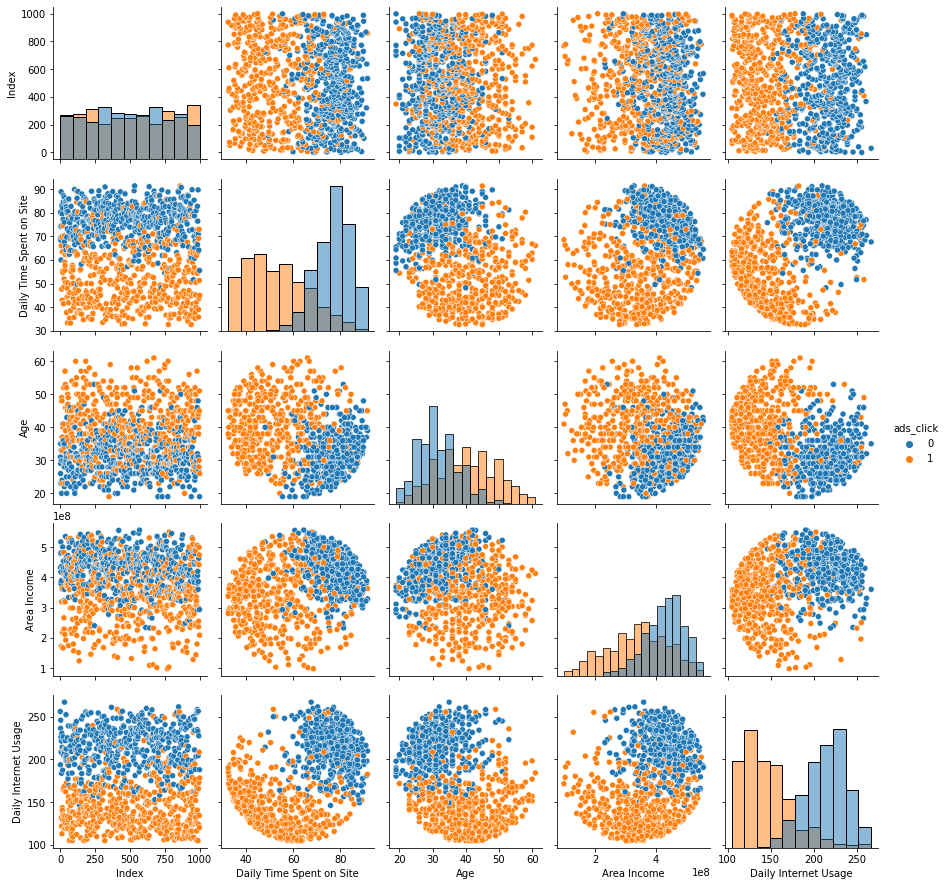

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(data = df[num], diag_kind='hist', hue= 'ads_click')
plt.show()

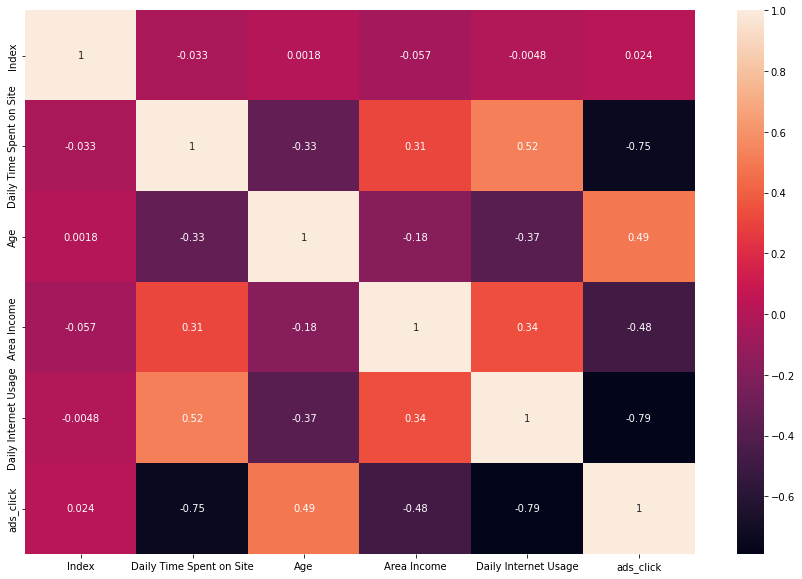

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num].corr(), annot= True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     1000 non-null   int64         
 1   Daily Time Spent on Site  987 non-null    float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               987 non-null    float64       
 4   Daily Internet Usage      989 non-null    float64       
 5   Male                      997 non-null    object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
 11  ads_click                 1000 non-null   int64         
dtypes: datetime64[ns](1),

In [ ]:
df.isna().sum()

Index                        0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
ads_click                    0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Male                      963 non-null    object        
 6   Timestamp                 963 non-null    datetime64[ns]
 7   Clicked on Ad             963 non-null    object        
 8   city                      963 non-null    object        
 9   province                  963 non-null    object        
 10  category                  963 non-null    object        
 11  ads_click                 963 non-null    int64         
dtypes: datetime64[ns](1), 

In [ ]:
df.duplicated().sum()

0

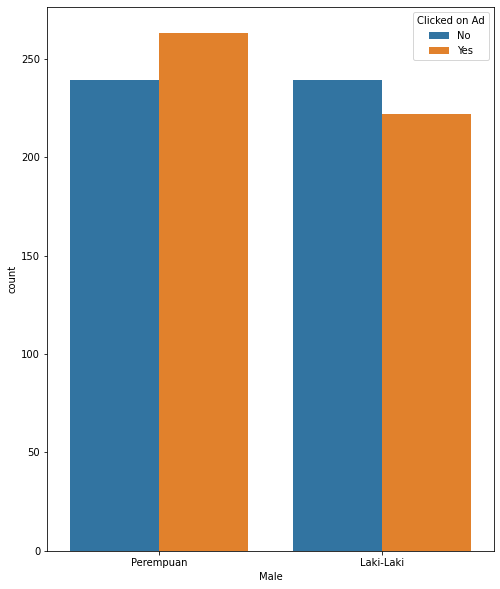

In [ ]:
plt.figure(figsize=(8,10))
sns.countplot(data=df, x='Male', hue = 'Clicked on Ad')
plt.show()

In [ ]:
df['Male'].value_counts()

Perempuan    502
Laki-Laki    461
Name: Male, dtype: int64

In [ ]:
df = df.rename(columns={'Male':'Gender'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Gender                    963 non-null    object        
 6   Timestamp                 963 non-null    datetime64[ns]
 7   Clicked on Ad             963 non-null    object        
 8   city                      963 non-null    object        
 9   province                  963 non-null    object        
 10  category                  963 non-null    object        
 11  ads_click                 963 non-null    int64         
dtypes: datetime64[ns](1), 

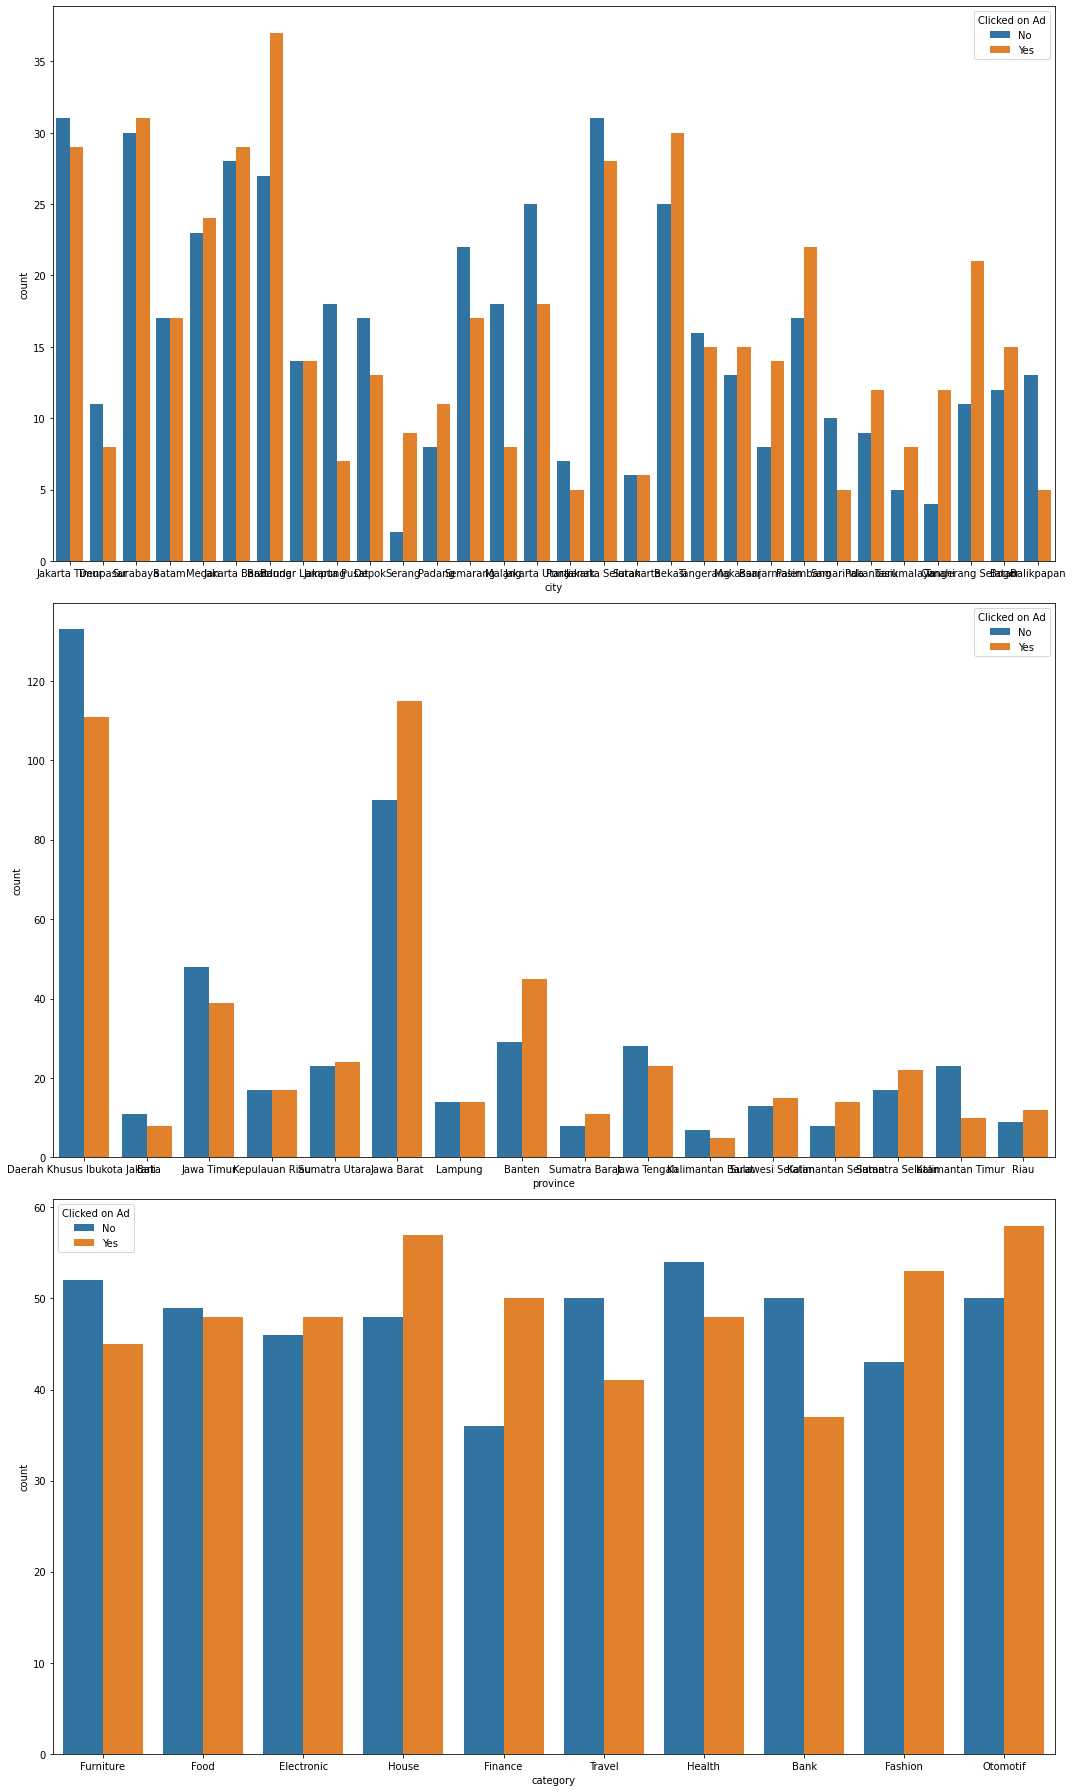

In [ ]:
feature = ['city', 'province', 'category']

plt.figure (figsize=(15,25))
for i in range(len(feature)):
  plt.subplot(3,1,i+1)
  sns.countplot(data=df, x= feature[i], hue= 'Clicked on Ad')
  plt.tight_layout()
plt.show()

In [ ]:
df[feature].describe().reset_index()

,index,city,province,category
0,count,963,963,963
1,unique,30,16,10
2,top,Bandung,Daerah Khusus Ibukota Jakarta,Otomotif
3,freq,64,244,108


In [ ]:
from datetime import datetime as dt

df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['week'] = df['Timestamp'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Gender                    963 non-null    object        
 6   Timestamp                 963 non-null    datetime64[ns]
 7   Clicked on Ad             963 non-null    object        
 8   city                      963 non-null    object        
 9   province                  963 non-null    object        
 10  category                  963 non-null    object        
 11  ads_click                 963 non-null    int64         
 12  year                  

In [ ]:
df[['Timestamp','year','month','week','day']].sample(10)

,Timestamp,year,month,week,day
262,2016-02-02 08:55:00,2016,2,5,2
419,2016-06-06 22:41:00,2016,6,23,6
957,2016-04-28 01:24:00,2016,4,17,28
629,2016-01-24 01:53:00,2016,1,3,24
119,2016-06-11 18:32:00,2016,6,23,11
221,2016-03-04 10:13:00,2016,3,9,4
509,2016-01-02 04:50:00,2016,1,53,2
379,2016-07-13 11:41:00,2016,7,28,13
172,2016-03-19 14:23:00,2016,3,11,19
287,2016-06-28 20:13:00,2016,6,26,28


In [ ]:
df = pd.get_dummies(df, prefix=['Gender'], columns=['Gender'], drop_first= False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Timestamp                 963 non-null    datetime64[ns]
 6   Clicked on Ad             963 non-null    object        
 7   city                      963 non-null    object        
 8   province                  963 non-null    object        
 9   category                  963 non-null    object        
 10  ads_click                 963 non-null    int64         
 11  year                      963 non-null    int64         
 12  month                 

In [ ]:
df = df.rename(columns = {'Index':'index', 'Daily Time Spent on Site':'daily_time_spent_on_site', 
                          'Age':'age', 'Area Income':'area_income','Daily Internet Usage':'daily_internet_usage', 
                          'Timestamp':'timestamp', 'Clicked on Ad':'clicked_on_ad', 'Gender_Laki-Laki':'gender_laki-laki', 
                          'Gender_Perempuan':'gender_perempuan' })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     963 non-null    int64         
 1   daily_time_spent_on_site  963 non-null    float64       
 2   age                       963 non-null    int64         
 3   area_income               963 non-null    float64       
 4   daily_internet_usage      963 non-null    float64       
 5   timestamp                 963 non-null    datetime64[ns]
 6   clicked_on_ad             963 non-null    object        
 7   city                      963 non-null    object        
 8   province                  963 non-null    object        
 9   category                  963 non-null    object        
 10  ads_click                 963 non-null    int64         
 11  year                      963 non-null    int64         
 12  month                 

In [ ]:
# Split data feature dan target
features = ['daily_time_spent_on_site','age','area_income','daily_internet_usage','year','month', 'day','week','gender_laki-laki','gender_perempuan']
target = ['ads_click']

X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [ ]:
models = {
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "XGB" : XGBClassifier()
}

for model, clf in models.items() :
  print(model)
  print(clf)
  clf.fit(X_train,y_train.values.ravel())
  y_pred_train = clf.predict(X_train)
  y_pred_proba_train = clf.predict_proba(X_train)[:,1]
  y_pred_test = clf.predict(X_test)
  y_pred_proba_test = clf.predict_proba(X_test)[:,1]
    
  print("Evaluate model: {}".format(model))
  
  accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
  print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
  accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
  print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

  precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
  print("Precission Train :" + str(round(precission_train*100,2)) + '%')
  precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
  print("Precission Test :" + str(round(precission_test*100,2)) + '%')

  recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
  print("Recall Train :" + str(round(recall_train*100,2)) + '%')
  recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
  print("Recall Test :" + str(round(recall_test*100,2)) + '%')

  f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
  print("F1 Train :" + str(round(f1_train*100,2)) + '%')
  f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
  print("F1 Test :" + str(round(f1_test*100,2)) + '%')

  fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
  auc_train = metrics.auc(fpr_train, tpr_train)
  print("AUC Test :"+str(round(auc_train*100,2))+'%')
  fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
  auc_test = metrics.auc(fpr_test, tpr_test)
  print("AUC Test :"+str(round(auc_test*100,2))+'%')
  print("\n")

DecisionTree
DecisionTreeClassifier(random_state=42)
Evaluate model: DecisionTree
Accuracy Train :100.0%
Accuracy Test :93.08%
Precission Train :100.0%
Precission Test :90.32%
Recall Train :100.0%
Recall Test :96.55%
F1 Train :100.0%
F1 Test :93.33%
AUC Test :100.0%
AUC Test :93.07%


RandomForest
RandomForestClassifier(random_state=42)
Evaluate model: RandomForest
Accuracy Train :100.0%
Accuracy Test :95.85%
Precission Train :100.0%
Precission Test :94.04%
Recall Train :100.0%
Recall Test :97.93%
F1 Train :100.0%
F1 Test :95.95%
AUC Test :100.0%
AUC Test :99.4%


KNeighbors
KNeighborsClassifier()
Evaluate model: KNeighbors
Accuracy Train :77.3%
Accuracy Test :65.4%
Precission Train :81.48%
Precission Test :67.18%
Recall Train :71.18%
Recall Test :60.69%
F1 Train :75.98%
F1 Test :63.77%
AUC Test :85.19%
AUC Test :69.65%


XGB
XGBClassifier()
Evaluate model: XGB
Accuracy Train :99.26%
Accuracy Test :95.85%
Precission Train :100.0%
Precission Test :94.04%
Recall Train :98.53%
Recall Test

kondisi yang diinginkan adalah false positif kecil agar ads lebih tepat sasaran dan biaya marketing dapat dimanfaatkan secara optimum. Maka dari itu digunakan matriks precision.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def norm(df) :
  for i in df :
    df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df),1))
  return df

X_norm = norm(X)
y_norm = norm(y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y_norm, test_size=0.3, random_state=42)

In [ ]:
models = {
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "XGB" : XGBClassifier()
}

for model, clf in models.items() :
  print(model)
  print(clf)
  clf.fit(X_train,y_train.values.ravel())
  y_pred_train = clf.predict(X_train)
  y_pred_proba_train = clf.predict_proba(X_train)[:,1]
  y_pred_test = clf.predict(X_test)
  y_pred_proba_test = clf.predict_proba(X_test)[:,1]
    
  print("Evaluate model: {}".format(model))
  
  accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
  print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
  accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
  print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

  precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
  print("Precission Train :" + str(round(precission_train*100,2)) + '%')
  precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
  print("Precission Test :" + str(round(precission_test*100,2)) + '%')

  recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
  print("Recall Train :" + str(round(recall_train*100,2)) + '%')
  recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
  print("Recall Test :" + str(round(recall_test*100,2)) + '%')

  f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
  print("F1 Train :" + str(round(f1_train*100,2)) + '%')
  f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
  print("F1 Test :" + str(round(f1_test*100,2)) + '%')

  fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
  auc_train = metrics.auc(fpr_train, tpr_train)
  print("AUC Test :"+str(round(auc_train*100,2))+'%')
  fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
  auc_test = metrics.auc(fpr_test, tpr_test)
  print("AUC Test :"+str(round(auc_test*100,2))+'%')
  print("\n")

DecisionTree
DecisionTreeClassifier(random_state=42)
Evaluate model: DecisionTree
Accuracy Train :100.0%
Accuracy Test :93.08%
Precission Train :100.0%
Precission Test :90.32%
Recall Train :100.0%
Recall Test :96.55%
F1 Train :100.0%
F1 Test :93.33%
AUC Test :100.0%
AUC Test :93.07%


RandomForest
RandomForestClassifier(random_state=42)
Evaluate model: RandomForest
Accuracy Train :100.0%
Accuracy Test :95.85%
Precission Train :100.0%
Precission Test :94.04%
Recall Train :100.0%
Recall Test :97.93%
F1 Train :100.0%
F1 Test :95.95%
AUC Test :100.0%
AUC Test :99.38%


KNeighbors
KNeighborsClassifier()
Evaluate model: KNeighbors
Accuracy Train :96.88%
Accuracy Test :94.46%
Precission Train :99.69%
Precission Test :97.08%
Recall Train :94.12%
Recall Test :91.72%
F1 Train :96.82%
F1 Test :94.33%
AUC Test :99.73%
AUC Test :98.14%


XGB
XGBClassifier()
Evaluate model: XGB
Accuracy Train :99.26%
Accuracy Test :95.85%
Precission Train :100.0%
Precission Test :94.04%
Recall Train :98.53%
Recall T

setelah dilakukan normalisasi hasil prediksi kneighbors mengalami meningkatan yang signifikan. KNeighbors memiliki model yang paling best fit. Maka dari itu akan digunakan model tersebut.


In [ ]:
XGB = XGBClassifier()

In [ ]:
XGB.fit(X_train,y_train.values.ravel())
y_pred_train = XGB.predict(X_train)
y_pred_proba_train = XGB.predict_proba(X_train)[:,1]
y_pred_test = XGB.predict(X_test)
y_pred_proba_test = XGB.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(XGB))

accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: XGBClassifier()
Accuracy Train :99.26%
Accuracy Test :95.85%
Precission Train :100.0%
Precission Test :94.04%
Recall Train :98.53%
Recall Test :97.93%
F1 Train :99.26%
F1 Test :95.95%
AUC Test :99.99%
AUC Test :99.35%




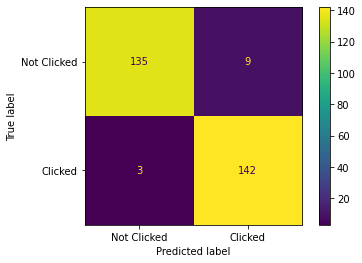

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Clicked','Clicked'])

cm_display.plot()
plt.show()

Text(0.5, 1.0, 'feature importance score')

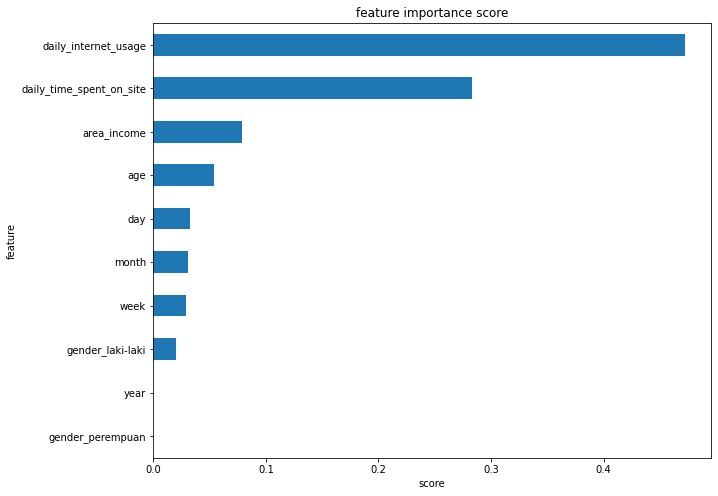

In [ ]:
feat_importances = pd.Series(XGB.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
performance_log = pd.DataFrame(columns=["Experiment","Precission","Accuracy","Recall","AUC"])

perf = {
    "Experiment": "Initial Model (XGBoost)",
    "Precission": str(round(precission_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,Experiment,Precission,Accuracy,Recall,AUC
0,Initial Model (XGBoost),94.04%,95.85%,97.93%,99.35%


In [ ]:
# Split data feature dan target
features = ['daily_time_spent_on_site','age','area_income','daily_internet_usage']
target = ['ads_click']

X = df[features]
y = df[target]

def norm(df) :
  for i in df :
    df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df),1))
  return df

X_norm = norm(X)
y_norm = norm(y)

X_train, X_test, y_train, y_test = train_test_split(X_norm,y_norm, test_size=0.3, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
XGB = XGBClassifier()

XGB.fit(X_train,y_train.values.ravel())
y_pred_train = XGB.predict(X_train)
y_pred_proba_train = XGB.predict_proba(X_train)[:,1]
y_pred_test = XGB.predict(X_test)
y_pred_proba_test = XGB.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(XGB))

accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: XGBClassifier()
Accuracy Train :98.81%
Accuracy Test :94.81%
Precission Train :99.7%
Precission Test :92.21%
Recall Train :97.94%
Recall Test :97.93%
F1 Train :98.81%
F1 Test :94.98%
AUC Test :99.96%
AUC Test :99.43%




In [ ]:
perf = {
    "Experiment": "Feature Reselection (XGBoost)",
    "Precission": str(round(precission_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,Experiment,Precission,Accuracy,Recall,AUC
0,Initial Model (XGBoost),94.04%,95.85%,97.93%,99.35%
1,Feature Reselection (XGBoost),92.21%,94.81%,97.93%,99.43%


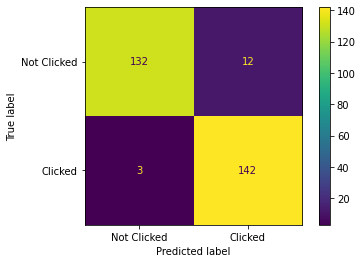

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Clicked','Clicked'])

cm_display.plot()
plt.show()

In [1]:
from sklearn.model_selection import GridSearchCV

hyperparams = dict(
                        booster = [ x for x in ['gbtree', 'gblinear']],
                        min_child_weight = [int(x) for x in np.linspace(1,20,2)],
                        max_leaves = [int(x) for x in np.linspace(1,10,1)],
                        max_depth = [int(x) for x in np.linspace(6,60,6)]   
                    )

NameError: ignored

In [ ]:
XGB = XGBClassifier()
xgb = GridSearchCV(XGB, hyperparams, scoring='precision')

xgb.fit(X_train,y_train.values.ravel())
y_pred_train = xgb.predict(X_train)
y_pred_proba_train = xgb.predict_proba(X_train)[:,1]
y_pred_test = xgb.predict(X_test)
y_pred_proba_test = xgb.predict_proba(X_test)[:,1]

print("Evaluate model: {}".format(XGB))

accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: XGBClassifier()
Accuracy Train :96.74%
Accuracy Test :96.19%
Precission Train :97.6%
Precission Test :94.67%
Recall Train :95.88%
Recall Test :97.93%
F1 Train :96.74%
F1 Test :96.27%
AUC Test :98.93%
AUC Test :99.19%




In [ ]:
for key, value in hyperparams.items() :
        print(key+':', xgb.best_estimator_.get_params()[key])

booster: gblinear
min_child_weight: 1
max_leaves: 1
max_depth: 6


In [ ]:
XGB = XGBClassifier(booster='gblinear', min_child_weight='1', max_leaves='1', max_depth ='6')

XGB.fit(X_train,y_train.values.ravel())
y_pred_train = XGB.predict(X_train)
y_pred_proba_train = XGB.predict_proba(X_train)[:,1]
y_pred_test = XGB.predict(X_test)
y_pred_proba_test = XGB.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(XGB))

accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: XGBClassifier(booster='gblinear', max_depth='6', max_leaves='1',
              min_child_weight='1')
Accuracy Train :96.74%
Accuracy Test :96.19%
Precission Train :97.6%
Precission Test :94.67%
Recall Train :95.88%
Recall Test :97.93%
F1 Train :96.74%
F1 Test :96.27%
AUC Test :98.93%
AUC Test :99.19%




In [ ]:
perf = {
    "Experiment": "Hyperparameter Tuning",
    "Precission": str(round(precission_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,Experiment,Precission,Accuracy,Recall,AUC
0,Initial Model (XGBoost),94.04%,95.85%,97.93%,99.35%
1,Feature Reselection (XGBoost),92.21%,94.81%,97.93%,99.43%
2,Hyperparameter Tuning,94.67%,96.19%,97.93%,99.19%


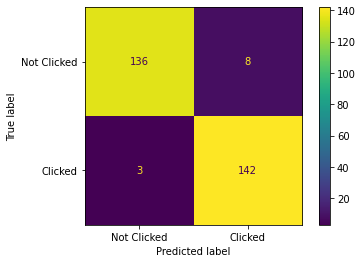

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Clicked','Clicked'])

cm_display.plot()
plt.show()

In [ ]:
#Feature Reselection 2
features = ['daily_time_spent_on_site','age','area_income','daily_internet_usage']
target = ['ads_click']

X = df[features]
y = df[target]

def norm(df) :
  for i in df :
    df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df),1))
  return df

X_norm = norm(X)
y_norm = norm(y)

X_train, X_test, y_train, y_test = train_test_split(X_norm,y_norm, test_size=0.3, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
XGB = XGBClassifier(booster='gblinear', min_child_weight='20', max_leaves='1', max_depth ='27')

XGB.fit(X_train,y_train.values.ravel())
y_pred_train = XGB.predict(X_train)
y_pred_proba_train = XGB.predict_proba(X_train)[:,1]
y_pred_test = XGB.predict(X_test)
y_pred_proba_test = XGB.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(XGB))

accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: XGBClassifier(booster='gblinear', max_depth='27', max_leaves='1',
              min_child_weight='20')
Accuracy Train :96.74%
Accuracy Test :96.19%
Precission Train :97.6%
Precission Test :94.67%
Recall Train :95.88%
Recall Test :97.93%
F1 Train :96.74%
F1 Test :96.27%
AUC Test :98.93%
AUC Test :99.19%




In [ ]:
perf = {
    "Experiment": "Feature Reselection 2",
    "Precission": str(round(precission_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,Experiment,Precission,Accuracy,Recall,AUC
0,Initial Model (XGBoost),94.04%,95.85%,97.93%,99.35%
1,Feature Reselection (XGBoost),94.04%,95.85%,97.93%,99.35%
2,Hyperparameter Tuning Randomizedsearch,95.33%,96.89%,98.62%,99.09%
3,Feature Reselection 2,94.67%,96.19%,97.93%,99.19%


In [ ]:
from sklearn.model_selection import GridSearchCV
XGB = XGBClassifier()
xgb = GridSearchCV(XGB, hyperparams, cv= 10)

xgb.fit(X_train,y_train.values.ravel())
y_pred_train = xgb.predict(X_train)
y_pred_proba_train = xgb.predict_proba(X_train)[:,1]
y_pred_test = xgb.predict(X_test)
y_pred_proba_test = xgb.predict_proba(X_test)[:,1]

print("Evaluate model: {}".format(XGB))

accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: XGBClassifier()
Accuracy Train :96.74%
Accuracy Test :96.19%
Precission Train :97.6%
Precission Test :94.67%
Recall Train :95.88%
Recall Test :97.93%
F1 Train :96.74%
F1 Test :96.27%
AUC Test :98.93%
AUC Test :99.19%




In [ ]:
for key, value in hyperparams.items() :
        print(key+':', xgb.best_estimator_.get_params()[key])

booster: gblinear
min_child_weight: 1
max_leaves: 1
max_depth: 6


In [ ]:
XGB = XGBClassifier(booster='gblinear', min_child_weight='1', max_leaves='1', max_depth ='6')

XGB.fit(X_train,y_train.values.ravel())
y_pred_train = XGB.predict(X_train)
y_pred_proba_train = XGB.predict_proba(X_train)[:,1]
y_pred_test = XGB.predict(X_test)
y_pred_proba_test = XGB.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(XGB))

accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: XGBClassifier(booster='gblinear', max_depth='6', max_leaves='1',
              min_child_weight='1')
Accuracy Train :96.74%
Accuracy Test :96.19%
Precission Train :97.6%
Precission Test :94.67%
Recall Train :95.88%
Recall Test :97.93%
F1 Train :96.74%
F1 Test :96.27%
AUC Test :98.93%
AUC Test :99.19%




In [ ]:
perf = {
    "Experiment": "Hyperparam tuning 2",
    "Precission": str(round(precission_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,Experiment,Precission,Accuracy,Recall,AUC
0,Initial Model (XGBoost),94.04%,95.85%,97.93%,99.35%
1,Feature Reselection (XGBoost),94.04%,95.85%,97.93%,99.35%
2,Hyperparameter Tuning Randomizedsearch,95.33%,96.89%,98.62%,99.09%
3,Feature Reselection 2,94.67%,96.19%,97.93%,99.19%
4,Hyperparam tuning 2,94.67%,96.19%,97.93%,99.19%


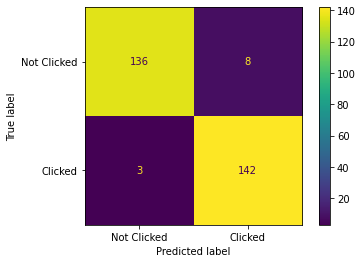

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Clicked','Clicked'])

cm_display.plot()
plt.show()

In [ ]:
y_test.value_counts()

ads_click
1.0          145
0.0          144
dtype: int64